## 4.10 Coding Etiquette & Excel Reporting

Table of Contents

Importing libraries & data

Addressing Personally Identifiable Information

Creating a regional flag within the dataset

Excluding low-activity customers

Creating customer 'profile' for targeted marketing purposes

Visualizing 'profile' distribution

Looking for insights through the customer 'profile' groups

Comparing customer profiles with regions & departments

In [1]:
# Import Liabraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Assign path 
path = r'/Users/ishitabhasin/Desktop/Career Foundary Tasks/Instacart Basket Analysis'

In [3]:
path

'/Users/ishitabhasin/Desktop/Career Foundary Tasks/Instacart Basket Analysis'

In [5]:
#Importing file from path
df_ords_prods_cstm = pd.read_pickle(os.path.join(path, 'orders_products_all.pkl'))

In [6]:
# Importing Departments data frame
df_dept = pd.read_csv(os.path.join(path, 'departments_wrangled.csv'))

In [7]:
df_ords_prods_cstm.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,spending_flag,median_order_frequency,order_frequency_flag,gender,state,age,date_joined,dependents,family_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,High Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,High Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,High Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,High Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,High Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [8]:
# Dropping Eval_set column
df_ords_prods_cstm = df_ords_prods_cstm.drop(columns = ['eval_set'])

In [9]:
df_ords_prods_cstm.shape

(32404859, 31)

In [10]:
df_ords_prods_cstm.dtypes

order_id                     int64
user_id                     object
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
_merge                    category
price_range_loc             object
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
avg_price                  float64
spending_flag               object
median_order_frequency     float64
order_frequency_flag        object
gender                      object
state                       object
age                          int64
date_joined                 object
dependents          

In [11]:
# Changing data types in df_ords_prods_all dataframe to save sapce

df_ords_prods_cstm['user_id'] = df_ords_prods_cstm['user_id'].astype('str')
df_ords_prods_cstm['order_number'] = df_ords_prods_cstm['order_number'].astype('int8')
df_ords_prods_cstm['orders_day_of_week'] = df_ords_prods_cstm['orders_day_of_week'].astype('int8')
df_ords_prods_cstm['order_hour_of_day'] = df_ords_prods_cstm['order_hour_of_day'].astype('int8')


In [12]:
df_ords_prods_cstm['product_id'] = df_ords_prods_cstm['product_id'].astype('int32')
df_ords_prods_cstm['reordered'] = df_ords_prods_cstm['reordered'].astype('int8')
df_ords_prods_cstm['aisle_id'] = df_ords_prods_cstm['aisle_id'].astype('int8')
df_ords_prods_cstm['department_id'] = df_ords_prods_cstm['department_id'].astype('int8')

In [13]:
df_ords_prods_cstm['max_order'] = df_ords_prods_cstm['max_order'].astype('int8')
df_ords_prods_cstm['days_since_prior_order'] = df_ords_prods_cstm['days_since_prior_order'].astype('float16')
df_ords_prods_cstm['prices'] = df_ords_prods_cstm['prices'].astype('float16')
df_ords_prods_cstm['avg_price'] = df_ords_prods_cstm['avg_price'].astype('float16')
df_ords_prods_cstm['median_order_frequency'] = df_ords_prods_cstm['median_order_frequency'].astype('float16')

In [14]:
df_ords_prods_cstm['user_id'] = df_ords_prods_cstm['user_id'].astype('str')
df_ords_prods_cstm['dependents'] = df_ords_prods_cstm['dependents'].astype('int8')
df_ords_prods_cstm['age'] = df_ords_prods_cstm['age'].astype('int8')
df_ords_prods_cstm['income'] = df_ords_prods_cstm['income'].astype('int32')

### Q2. The columns containing the first name and surmane have already been removed form the data frame, so as to address the PII issue.

### Q3. Creation of a new column "Regions" from the "States" column

In [15]:
# Checking state column

df_ords_prods_cstm['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [16]:
# Creating the region lists

region_1_NE = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
region_2_MW = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
region_3_S = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
region_4_W = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [17]:
# Creating the new "region" column

df_ords_prods_cstm.loc[df_ords_prods_cstm['state'].isin(region_1_NE), 'region'] = 'Northeast'
df_ords_prods_cstm.loc[df_ords_prods_cstm['state'].isin(region_2_MW), 'region'] = 'Midwest'
df_ords_prods_cstm.loc[df_ords_prods_cstm['state'].isin(region_3_S), 'region'] = 'South'
df_ords_prods_cstm.loc[df_ords_prods_cstm['state'].isin(region_4_W), 'region'] = 'West'

In [18]:
# Checking the output for the new table

df_ords_prods_cstm.shape

(32404859, 32)

In [19]:
df_ords_prods_cstm['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [20]:
# Creating a crosstab between region and spenging flag column to find differences in spending habits

crosstab_region_spending = pd.crosstab (df_ords_prods_cstm['spending_flag'], df_ords_prods_cstm['region'], dropna = False)

In [21]:
crosstab_region_spending

region,Midwest,Northeast,South,West
spending_flag,,,,
High Spender,7589534,5717129,10781873,8284433
Low Spender,7791,5607,10012,8480


Text(0.5, 0, 'Region')

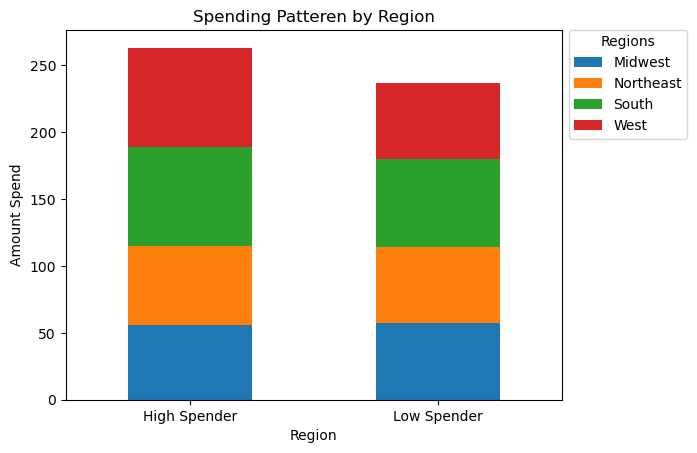

In [22]:
# Creating a visualization between spending and region

n = 500
np.random.seed(365)
region = np.random.choice(['Midwest','Northeast', 'South', 'West'], n)
spending_flag = np.random.choice(['High Spender','Low Spender'], n)

df = pd.DataFrame({'region': region, 'spending_flag': spending_flag})
ct = pd.crosstab(df.spending_flag, df.region)

stacked_region_spending = ct.plot(kind = 'bar', stacked=True, rot=0) 
plt.title('Spending Patteren by Region')
stacked_region_spending.legend(title='Regions', bbox_to_anchor=(1, 1.02),loc='upper left')
plt.ylabel('Amount Spend')
plt.xlabel('Region')


In [23]:
#Exporting the stacked column chart as png

stacked_region_spending = stacked_region_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Stacked_region_spending1.png'),bbox_inches = 'tight')

## Q4 . Creating an exclusion Flag for low-activity customers (customers with less than 5 orders)

In [24]:
# Creating activity_flag based on the number of orders

df_ords_prods_cstm.loc[df_ords_prods_cstm['max_order'] <5, 'activity_flag'] = 'Low activity'
df_ords_prods_cstm.loc[df_ords_prods_cstm['max_order'] >=5, 'activity_flag'] = 'High activity'
df_ords_prods_cstm.tail(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,date_joined,dependents,family_status,income,region,activity_flag
32404849,1539810,106143,21,1,18,5.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404850,3308056,106143,22,4,20,10.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404851,2988973,106143,23,2,22,5.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404852,930,106143,24,6,12,4.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404853,467253,106143,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404854,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404855,484769,66343,1,6,11,NaN,47210,1,0,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low activity
32404856,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low activity
32404857,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low activity
32404858,2922475,66343,4,1,12,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low activity


In [25]:
# Checking the "activity_flag" column

df_ords_prods_cstm['activity_flag'].value_counts (dropna = False)

High activity    30964564
Low activity      1440295
Name: activity_flag, dtype: int64

In [26]:
# Create a subset which excludes low_activity customers

high_activity_cstmrs = df_ords_prods_cstm[df_ords_prods_cstm['activity_flag'] == 'High activity']
high_activity_cstmrs.tail()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,date_joined,dependents,family_status,income,region,activity_flag
32404850,3308056,106143,22,4,20,10.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404851,2988973,106143,23,2,22,5.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404852,930,106143,24,6,12,4.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404853,467253,106143,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404854,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity


In [27]:
# Exporting the subset
high_activity_cstmrs.to_pickle(os.path.join(path, 'high_activity_cstmrs_orders.pkl'))

In [28]:
# Create a subset which excludes High_activity customers

low_activity_cstmrs = df_ords_prods_cstm[df_ords_prods_cstm['activity_flag'] == 'Low activity']
low_activity_cstmrs.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,date_joined,dependents,family_status,income,region,activity_flag
1510,520620,120,1,3,11,NaN,196,2,0,Soda,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low activity
1511,3273029,120,3,2,8,19.0,196,2,1,Soda,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low activity
1512,520620,120,1,3,11,NaN,46149,1,0,Zero Calorie Cola,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low activity
1513,3273029,120,3,2,8,19.0,46149,1,1,Zero Calorie Cola,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low activity
1514,520620,120,1,3,11,NaN,26348,3,0,Mixed Fruit Fruit Snacks,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low activity


In [29]:
# Exporting the low activity customer subset
low_activity_cstmrs.to_pickle(os.path.join(path, 'low_activity_cstmrs_orders.pkl'))

## CUSTOMER PROFILING

In [30]:
# Start profiling high activity customers

Cstmr = high_activity_cstmrs

### 1. Based on Age

In [31]:
Cstmr['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

#### From the above we can see the below:

Maximum Age = 81 years

Minimum Age = 18 years

Based on this data we can divide the customers into 3 categories as: 

Youth 18 - 39 years

Middle-Aged 40 - 64 years

Senior Citizens Above 65 years

In [32]:
Cstmr.loc[(df_ords_prods_cstm['age'] >= 18) & (Cstmr['age'] < 40), 'age_group'] = 'Youth'
Cstmr.loc[(df_ords_prods_cstm['age'] >= 40) & (Cstmr['age'] < 65), 'age_group'] = 'Middle Aged' 
Cstmr.loc[Cstmr['age'] >= 65, 'age_group'] = 'Senior Citizens'

/var/folders/m2/zxgfyynd7mlcccmlnk3x0n800000gn/T/ipykernel_43996/2224926731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cstmr.loc[(df_ords_prods_cstm['age'] >= 18) & (Cstmr['age'] < 40), 'age_group'] = 'Youth'


In [33]:
Cstmr['age_group'].value_counts(dropna = False)

Middle Aged        12103910
Youth              10665110
Senior Citizens     8195544
Name: age_group, dtype: int64

In [34]:
Cstmr.shape

(30964564, 34)

In [35]:
# Creating a crosstab between 'age_group' & 'orders_day_week' to get ordering pattern

crosstab_age_orders = pd.crosstab(Cstmr['age_group'], Cstmr['orders_day_of_week'], dropna = False)

In [36]:
crosstab_age_orders

orders_day_of_week,0,1,2,3,4,5,6
age_group,,,,,,,
Middle Aged,2301009,2112438,1583124,1431181,1415669,1576837,1683652
Senior Citizens,1566244,1417495,1065170,978350,956161,1066115,1146009
Youth,2041357,1881753,1376412,1260004,1253164,1390777,1461643


Text(0.5, 0, 'Age Group')

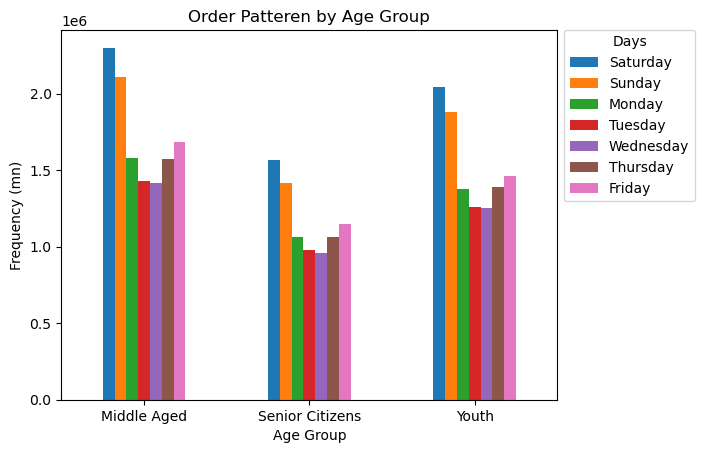

In [37]:
# Creating bar chart of the crosstab data
bar_age_orders = crosstab_age_orders.plot.bar(rot =0) 
plt.title('Order Patteren by Age Group')
bar_age_orders.legend(title='Days', bbox_to_anchor=(1, 1.02),loc='upper left', labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.ylabel('Frequency (mn)')
plt.xlabel('Age Group')

### From the above bar chart we see the following:

1. The most orders are placed on Saturday & Sunday
2. The lowest performing days are Tuesday & wednesday
3. This pattern is true across all the 3 age groups

In [38]:
# Exporting the bar chart 
bar_age_orders.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_orders.png'),bbox_inches = 'tight')

### 2. Number of Dependents

In [39]:
Cstmr['dependents'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: dependents, dtype: float64

#### From the above we see:

Max no. of Dependents = 3
Min no. of Dependents = 0

We can thus divide the data based on dependents as below:

Small Family = No 0 dependents

Medium Family = 1-2 dependents

Large Family = 3 dependents


In [40]:
Cstmr.loc[(Cstmr['dependents'] == 0), 'family_size'] = 'Small'
Cstmr.loc[(Cstmr['dependents'] > 0) & (Cstmr['dependents'] < 3), 'family_size'] = 'Medium' 
Cstmr.loc[Cstmr['dependents'] == 3 , 'family_size'] = 'Large'

/var/folders/m2/zxgfyynd7mlcccmlnk3x0n800000gn/T/ipykernel_43996/2404993072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cstmr.loc[(Cstmr['dependents'] == 0), 'family_size'] = 'Small'


In [41]:
Cstmr['family_size'].value_counts(dropna = False)

Medium    15452367
Large      7772516
Small      7739681
Name: family_size, dtype: int64

In [42]:
Cstmr.shape

(30964564, 35)

In [43]:
# Creating a crosstab between 'family_size' & 'dependents' to get ordering pattern

crosstab_family = pd.crosstab(Cstmr['family_status'], Cstmr['dependents'], dropna = False)

In [44]:
crosstab_family

dependents,0,1,2,3
family_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


#### We can see that only customers living with parents and siblings or are married have dependents.

In [45]:
Cstmr.loc[(Cstmr['family_status'] == 'married') & (Cstmr['dependents'] == 1), 'household'] = 'Couple Without Children'
Cstmr.loc[(Cstmr['family_status'] == 'married') & (Cstmr['dependents'] >= 2), 'household'] = 'Couple With Children'
Cstmr.loc[(Cstmr['family_status'] == 'divorced/widowed') | (Cstmr['family_status'] == 'single'), 'household'] = 'One Person'
Cstmr.loc[(Cstmr['family_status'] == 'divorced/widowed') & (Cstmr['dependents'] > 0 ), 'household'] = 'Single Parent'
Cstmr.loc[Cstmr['family_status'] == 'living with parents and siblings', 'household'] = 'Other Family'

/var/folders/m2/zxgfyynd7mlcccmlnk3x0n800000gn/T/ipykernel_43996/2976286955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cstmr.loc[(Cstmr['family_status'] == 'married') & (Cstmr['dependents'] == 1), 'household'] = 'Couple Without Children'


In [46]:
Cstmr['household'].value_counts(dropna = False)

Couple With Children       14532650
One Person                  7739681
Couple Without Children     7211061
Other Family                1481172
Name: household, dtype: int64

In [47]:
# Checking Output
Cstmr.shape

(30964564, 36)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Couple With Children'),
  Text(1, 0, 'One Person'),
  Text(2, 0, 'Couple Without Children'),
  Text(3, 0, 'Other Family')])

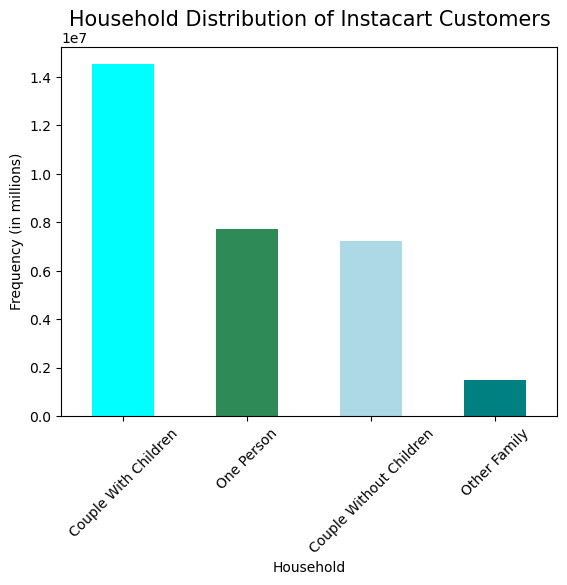

In [48]:
# Creating a bar chart for the household column

bar_household = Cstmr['household'].value_counts().plot.bar(color= ['aqua', 'seagreen', 'lightblue', 'teal'])
plt.title('Household Distribution of Instacart Customers', fontsize = 15, pad=15)
plt.ylabel('Frequency (in millions)', fontsize = 10)
plt.xlabel('Household',  fontsize = 10)
plt.xticks(rotation=45)

In [49]:
# Exporting the bar as png

bar_household.figure.savefig(os.path.join(path,  '04 Analysis', 'Visualizations', 'bar_household.png'))

### 3. Income Profiling

In [50]:
Cstmr['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

#### From the above we see:

Min Income = 25,900 

Max Income = 593,900

#### We can therefore group the Customers based on their income as below:

Low Income = <70,000

Middle-class = 70,000-100,000

Upper-middle-class = 100,000-130,000

High Income = >130,000

In [51]:
# Creating income_category column

Cstmr.loc[Cstmr['income'] < 70000, 'income_group'] = 'Low Income'
Cstmr.loc[(Cstmr['income'] >= 70000) & (Cstmr['income']< 100000), 'income_group'] = 'Middle-class'
Cstmr.loc[(Cstmr['income'] >= 100000) & (Cstmr['income']< 130000), 'income_group'] = 'Upper-mid-class'
Cstmr.loc[Cstmr['income'] >= 130000, 'income_group'] = 'High Income'

/var/folders/m2/zxgfyynd7mlcccmlnk3x0n800000gn/T/ipykernel_43996/3744194052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cstmr.loc[Cstmr['income'] < 70000, 'income_group'] = 'Low Income'


In [52]:
# Checking output

Cstmr['income_group'].value_counts(dropna = False)

Low Income         8520533
Middle-class       8236629
High Income        7401414
Upper-mid-class    6805988
Name: income_group, dtype: int64

In [53]:
# Checking output
Cstmr.shape

(30964564, 37)

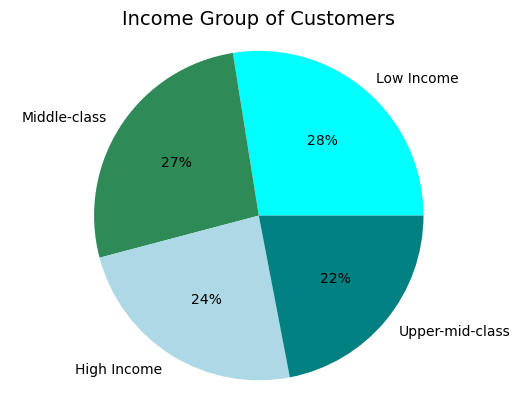

In [54]:
income_pie = Cstmr['income_group'].value_counts().plot.pie(labels = ['Low Income', 'Middle-class', 'High Income', 'Upper-mid-class'], autopct=('%1.f%%'), colors = ['aqua', 'seagreen', 'lightblue', 'teal'], label = '')
plt.title('Income Group of Customers', fontsize = 14)
plt.axis('equal')
plt.show()

In [55]:
# Exporting the pie chart as png

income_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_pie.png'))

### 4. Customer segmentation by departent

#### Analysing the purchasing habits of the Customers

In [56]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [57]:
df_dept.rename(columns= {"Unnamed: 0": "department_id"}, inplace = True)

In [58]:
#creating department dictionary
dpt_map = dict(zip(df_dept['department_id'], df_dept['department']))

In [59]:
dpt_map

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [60]:
Cstmr['department'] = Cstmr['department_id'].map(dpt_map)

/var/folders/m2/zxgfyynd7mlcccmlnk3x0n800000gn/T/ipykernel_43996/124941897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cstmr['department'] = Cstmr['department_id'].map(dpt_map)


In [61]:
Cstmr.shape

(30964564, 38)

In [62]:
# Distribution of 'department' values in 'Cstmr' dataframe

Cstmr['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

## Behavioural Segmentation

### 4.1 Alcohol Drinkers

In [63]:
# Creating alcohol_drinker column

Cstmr.loc[Cstmr['department'] !='alcohol', 'alcohol_drinker'] = 'No'
Cstmr.loc[Cstmr['department'] =='alcohol', 'alcohol_drinker'] = 'Yes'

/var/folders/m2/zxgfyynd7mlcccmlnk3x0n800000gn/T/ipykernel_43996/2673646265.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cstmr.loc[Cstmr['department'] !='alcohol', 'alcohol_drinker'] = 'No'


In [64]:
Cstmr['alcohol_drinker'].value_counts(dropna = False)

No     30819937
Yes      144627
Name: alcohol_drinker, dtype: int64

In [65]:
Cstmr.shape

(30964564, 39)

### 4.2 Families with babies

In [66]:
# Creating Have_babies column

Cstmr.loc[Cstmr['department'] == 'babies','Have_babies'] = 'Yes'
Cstmr.loc[Cstmr['department'] != 'babies','Have_babies'] = 'No'

/var/folders/m2/zxgfyynd7mlcccmlnk3x0n800000gn/T/ipykernel_43996/4241566122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cstmr.loc[Cstmr['department'] == 'babies','Have_babies'] = 'Yes'


In [67]:
Cstmr['Have_babies'].value_counts(dropna = False)

No     30554172
Yes      410392
Name: Have_babies, dtype: int64

In [68]:
Cstmr.shape

(30964564, 40)

In [69]:
# Creating a crosstab between 'income_group' and 'region' column in different regions

crosstab_income_region = pd.crosstab (Cstmr['region'],Cstmr['income_group'], dropna = False)
crosstab_income_region

income_group,High Income,Low Income,Middle-class,Upper-mid-class
region,,,,
Midwest,1763002,1974266,1887154,1637091
Northeast,1308807,1486808,1461393,1207677
South,2442801,2849538,2797656,2221144
West,1886804,2209921,2090426,1740076


In [70]:
ct_bybs = pd.crosstab(Cstmr['region'], Cstmr['Have_babies'], dropna = False)

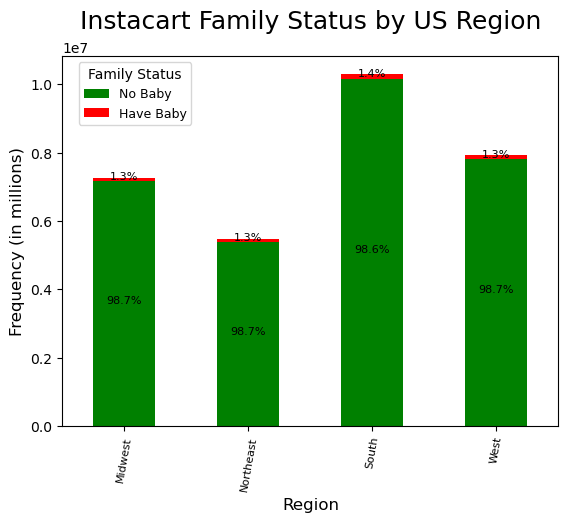

In [71]:
bar_bybs = ct_bybs.plot(kind = 'bar', stacked = True, color= ['green', 'red'])
bar_bybs.legend(title='Family Status', bbox_to_anchor=(0.02, 1.0), loc='upper left', labels=['No Baby', 'Have Baby'], fontsize = 9)
plt.title('Instacart Family Status by US Region', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)
plt.xticks(rotation=80, fontsize = 8)

# Annotating the stacked bar chart

# Get the total for each row
total = ct_bybs.sum(axis=1)

# Calculate the percent for each row
per = ct_bybs.div(total, axis=0).mul(100).round(1)

# Iterate through the containers
for c in bar_bybs.containers:
    
    # Get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # Create custom labels with the bar height and the percent from the per column
    labels = [f'{row}%'if v.get_height() > 0 else '' for v, row in zip(c,per[(label)])]
    
    # Add the annotation
    bar_bybs.bar_label(c, labels=labels, label_type='center', fontsize = 8, rotation = 0,  fontweight= 'normal', padding = 2)  


### < 2% of Instacart families have babies

In [72]:
# Export
bar_bybs.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','baby_fams_regional_barchart.png'), bbox_inches = 'tight')

#### Non-Veg Customers

In [73]:
# Create a profile for customers that eat meat 
Cstmr.loc[Cstmr['department_id'] ==11, 'profile'] = 'Non-Vegetarian'

/var/folders/m2/zxgfyynd7mlcccmlnk3x0n800000gn/T/ipykernel_43996/1508984657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cstmr.loc[Cstmr['department_id'] ==11, 'profile'] = 'Non-Vegetarian'


#### Snack Eaters

In [74]:
# Create a profile for customers that buy snacks
Cstmr.loc[Cstmr['department_id'] ==19, 'profile'] = 'Snackers'

#### Have babies

In [75]:
# Create a profile for customers with babies
Cstmr.loc[(Cstmr['dependents'] > 0) & (Cstmr['department_id'] == 18), 'profile'] = 'Have Babies'

#### Income of Families

In [76]:
# Create a profile for high income families 
Cstmr.loc[(Cstmr['dependents'] > 1) & (Cstmr['income'] > 128102), 'profile'] = 'High-Income Family'

In [77]:
# Create a profile for average income families
Cstmr.loc[(Cstmr['dependents'] > 1) & (Cstmr['income'] >67292) & (Cstmr['income'] < 128102), 'profile'] = 'Average-Income Family'

In [78]:
# Create a profile for low income families
Cstmr.loc[(Cstmr['dependents'] > 1) & (Cstmr['income'] < 67292), 'profile'] = 'Low-Income Family'

In [79]:
# Create a profile for high income single adults without children
Cstmr.loc[(Cstmr['family_status'] == 'single') & (Cstmr ['dependents'] == 0) & (Cstmr['income'] > 128102) , 'profile'] = 'Single Adult'

#### Income of Retired 

In [80]:
# Create a profile for rich retired 
Cstmr.loc[(Cstmr['income'] > 128102) & (Cstmr['age'] > 65),'profile'] ='Rich Retired'

In [81]:
# Create a profile for average retired 
Cstmr.loc[(Cstmr['income'] > 67292) & (Cstmr['income'] < 128102) & (Cstmr['age'] < 65), 'profile'] = 'Average Retired'

In [82]:
# Create a profile for poor retired
Cstmr.loc[(Cstmr['income'] < 67292) & (Cstmr['age'] > 65),'profile'] ='Poor Retired'

#### Pet Owners

In [83]:
# Create a profile for pet owners
Cstmr.loc[Cstmr['department_id'] ==8, 'profile'] = 'Pet Owners'

In [84]:
# Fill NaN as "Other"
Cstmr['profile'] = Cstmr['profile'].fillna('Other')

/var/folders/m2/zxgfyynd7mlcccmlnk3x0n800000gn/T/ipykernel_43996/3965097854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cstmr['profile'] = Cstmr['profile'].fillna('Other')


In [85]:
Cstmr['profile'].value_counts(dropna = False)

Average Retired          11443704
Other                     5993573
Low-Income Family         3378392
Rich Retired              2946712
High-Income Family        2368980
Average-Income Family     2011746
Poor Retired               993651
Single Adult               929337
Snackers                   664874
Non-Vegetarian              93384
Pet Owners                  93060
Have Babies                 47151
Name: profile, dtype: int64

In [86]:
bar = pd.DataFrame({'Instacart Customers in Millions':[1,2,3,4,5], 'Customer Profiles':[10,5,2,4,5]})

Text(0.5, 0, 'Customer Profiles')

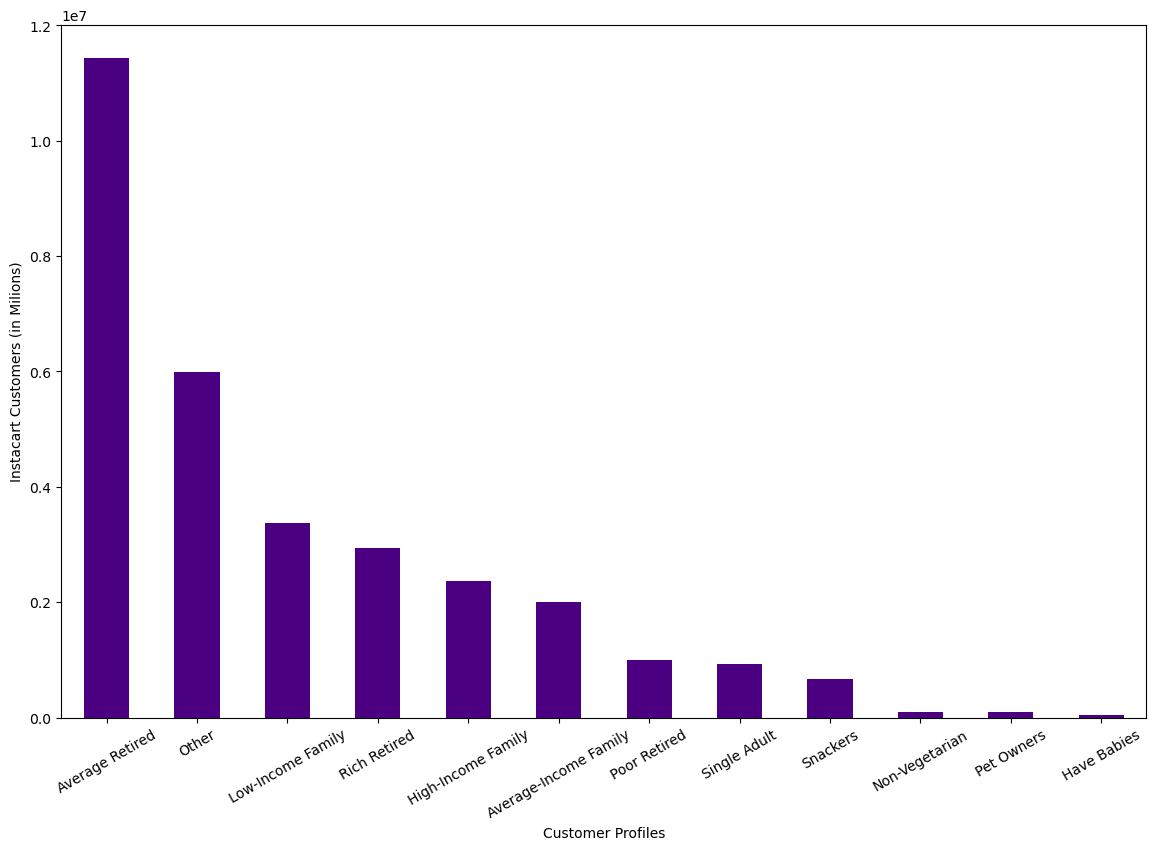

In [87]:
# Creating a barchart with the new profiles
bar = Cstmr['profile'].value_counts().plot.bar(rot=30, figsize = (14,9), color = 'indigo')
plt.ylabel ('Instacart Customers (in Milions)')
plt.xlabel ('Customer Profiles')

In [88]:
# Exporting the bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','bar_cust_profi.png'),bbox_inches = 'tight')

###  Order time of Day

In [89]:
#distribution of orders within 24 hours day

df_ords_prods_cstm['order_hour_of_day'].value_counts(dropna = False).sort_index()

0      218769
1      115700
2       69375
3       51281
4       53242
5       87961
6      290493
7      891054
8     1718118
9     2454203
10    2761760
11    2736140
12    2618532
13    2660954
14    2689136
15    2662144
16    2535202
17    2087654
18    1636502
19    1258305
20     976156
21     795637
22     634225
23     402316
Name: order_hour_of_day, dtype: int64

#### Observations: Most popular hours of the day for purchases are within the typical working day, 9 - 6. there are however some strong sales before 9 and in the evening.

In [90]:
#create list for new order_time_day column
result = []

for hour in df_ords_prods_cstm['order_hour_of_day']:
    if hour in [0, 1, 2, 3, 4, 17, 18, 19, 20, 21, 22, 23]:
        result.append('Night owl')
    elif hour in [5, 6, 7, 8]:
        result.append('Early bird')
    else:
        result.append('Regular')

In [91]:
result

['Early bird',
 'Early bird',
 'Regular',
 'Early bird',
 'Regular',
 'Early bird',
 'Regular',
 'Regular',
 'Regular',
 'Early bird',
 'Early bird',
 'Early bird',
 'Early bird',
 'Regular',
 'Early bird',
 'Regular',
 'Early bird',
 'Regular',
 'Regular',
 'Regular',
 'Early bird',
 'Early bird',
 'Early bird',
 'Early bird',
 'Early bird',
 'Early bird',
 'Regular',
 'Early bird',
 'Regular',
 'Early bird',
 'Regular',
 'Regular',
 'Regular',
 'Early bird',
 'Early bird',
 'Regular',
 'Early bird',
 'Regular',
 'Early bird',
 'Regular',
 'Early bird',
 'Regular',
 'Early bird',
 'Regular',
 'Regular',
 'Regular',
 'Early bird',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Early bird',
 'Regular',
 'Regular',
 'Early bird',
 'Early bird',
 'Early bird',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Night owl',
 'Early bird',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regula

In [92]:
df_ords_prods_cstm['order_time_period'] = result

In [93]:
#print the frequency of the new column
df_ords_prods_cstm['order_time_period'].value_counts(dropna = False)

Regular       21118071
Night owl      8299162
Early bird     2987626
Name: order_time_period, dtype: int64

In [94]:
df_ords_prods_cstm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int8    
 3   orders_day_of_week      int8    
 4   order_hour_of_day       int8    
 5   days_since_prior_order  float16 
 6   product_id              int32   
 7   add_to_cart_order       int64   
 8   reordered               int8    
 9   product_name            object  
 10  aisle_id                int8    
 11  department_id           int8    
 12  prices                  float16 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int8    
 19  loyalty_flag            object  
 20  avg_price               float16 
 21  spendi

In [95]:
df_ords_prods_cstm['order_time_period'].value_counts(dropna = False, normalize = True)

Regular       0.651695
Night owl     0.256109
Early bird    0.092197
Name: order_time_period, dtype: float64

(array([0, 1, 2]),
 [Text(0, 0, 'Regular'), Text(1, 0, 'Night owl'), Text(2, 0, 'Early bird')])

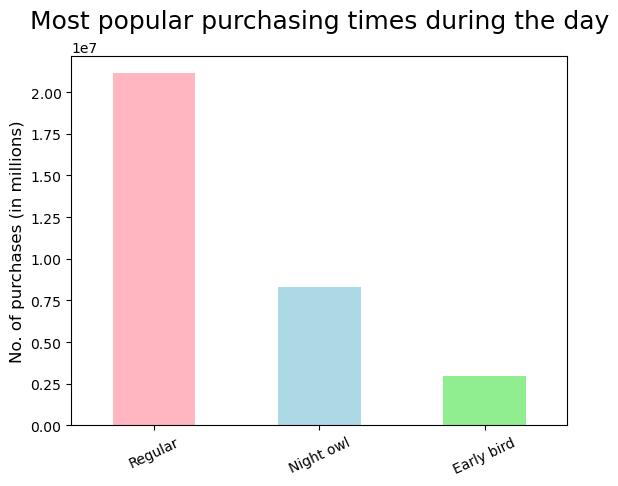

In [96]:
#creating a bar chart for order habit column
bar_loyalty = df_ords_prods_cstm['order_time_period'].value_counts().plot.bar(color = ['lightpink', 'lightblue', 'lightgreen'])
plt.title('Most popular purchasing times during the day', fontsize = 18, pad=20)
plt.ylabel('No. of purchases (in millions)', fontsize = 12)
plt.xticks(rotation=25)

In [97]:
# Exporting chart as png

bar_loyalty = bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Bar_most_purchsing_in_day.png'),bbox_inches = 'tight')

### Region and hour of day

In [98]:
#customer comparison by region & order hour of day 

crosstab_age_hour = pd.crosstab(Cstmr['age_group'], df_ords_prods_cstm['order_time_period'], dropna = False)

In [99]:
crosstab_age_hour

order_time_period,Early bird,Night owl,Regular
age_group,,,
Middle Aged,1124900,3090145,7888865
Senior Citizens,773040,2099209,5323295
Youth,989814,2706600,6968696


Text(0.5, 0, 'Age Group')

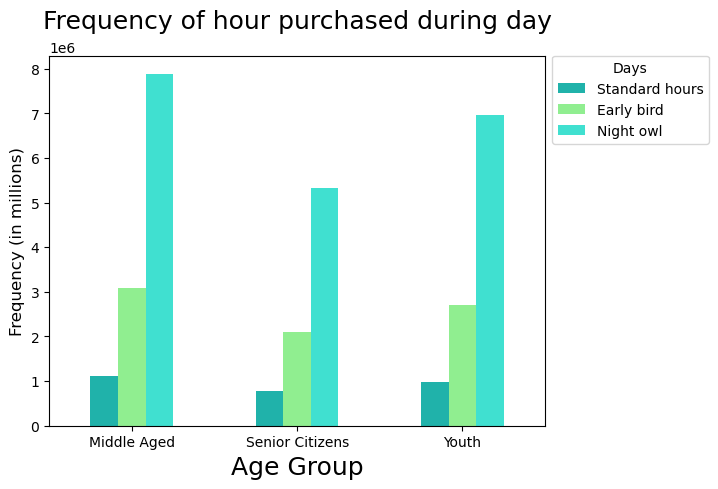

In [100]:
# Visualization of crosstab_age_day

bar_age_hour = crosstab_age_hour.plot(kind = 'bar', rot = 0, color= ['lightseagreen', 'lightgreen', 'turquoise'])
bar_age_hour.legend(title='Days', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Standard hours', 'Early bird', 'Night owl'])
plt.title('Frequency of hour purchased during day', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Group',  fontsize = 18)

In [101]:
# Exporting chart as png

bar_age_hour = bar_age_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Bar_age_hour.png'),bbox_inches = 'tight')

### Aggregate the Max, Min & Mean Values

In [102]:
# Comparing the Max, Min & Mean Values
Cstmr.groupby('profile').agg({'prices': ['max','min','mean'], 'days_since_prior_order':['mean', 'min','max']})

prices                     days_since_prior_order       \
                         max       min      mean                   mean  min   
profile                                                                        
Average Retired         25.0  1.000000  7.957031              10.757812  0.0   
Average-Income Family   25.0  1.000000  7.945312              10.742188  0.0   
Have Babies             15.0  1.000000  7.632812              10.132812  0.0   
High-Income Family      25.0  1.000000  7.953125              10.812500  0.0   
Low-Income Family       25.0  1.000000  7.382812              10.929688  0.0   
Non-Vegetarian          15.0  1.000000  7.960938              11.406250  0.0   
Other                   25.0  1.000000  8.054688              10.875000  0.0   
Pet Owners              15.0  1.000000  7.886719              11.593750  0.0   
Poor Retired            25.0  1.000000  6.703125              11.093750  0.0   
Rich Retired            25.0  1.000000  7.957031              10.718750  0.0   
Single Adult            25.0  1.000000  7.933594              10.679688  0.0   
Snackers                 7.0  1.599609  4.265625              10.781250  0.0   

                             
                        max  
profile                      
Average Retired        30.0  
Average-Income Family  30.0  
Have Babies            30.0  
High-Income Family     30.0  
Low-Income Family      30.0  
Non-Vegetarian         30.0  
Other                  30.0  
Pet Owners             30.0  
Poor Retired           30.0  
Rich Retired           30.0  
Single Adult           30.0  
Snackers               30.0

### Q8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [103]:
# Comparing customer profiles & regions
crosstab3 = pd.crosstab(Cstmr['profile'], Cstmr['region'], dropna = False)

In [104]:
crosstab3

region,Midwest,Northeast,South,West
profile,,,,
Average Retired,2678831,2001315,3833308,2930250
Average-Income Family,461452,360607,662387,527300
Have Babies,11877,8422,14914,11938
High-Income Family,569004,427743,771098,601135
Low-Income Family,789769,588581,1125831,874211
Non-Vegetarian,22422,16932,31331,22699
Other,1415545,1065471,2004336,1508221
Pet Owners,21358,17734,29909,24059
Poor Retired,222174,180499,331546,259432


In [105]:
# Comparing customer profiles & departments
crosstab4 = pd.crosstab(Cstmr['profile'], Cstmr['department_id'], dropna = False)

In [106]:
crosstab4

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
profile,,,,,,,,,,,,,,,,,,,,,
Average Retired,791721,12798,419265,3457991,50857,98563,898471,0,317424,12187,...,268486,671607,238970,387558,1954402,251694,166158,890557,373256,24194
Average-Income Family,139432,2125,73254,609739,8147,17146,156010,0,56657,2221,...,48290,119920,40325,69119,341188,44574,27480,159736,65629,4261
Have Babies,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,47151,0,0,0
High-Income Family,165423,2768,90778,702406,12620,20440,188021,0,66239,2236,...,57035,141109,49432,82370,403200,54345,33065,182363,77655,4878
Low-Income Family,227591,3618,117232,939268,15680,25286,315883,0,80635,4317,...,59368,183416,80474,99411,539597,79627,38446,405251,109324,7062
Non-Vegetarian,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Other,462664,7694,244788,1964571,31807,56164,586406,0,176097,7323,...,139713,388979,153273,217528,1130293,153788,36502,0,221764,14219
Pet Owners,0,0,0,0,0,0,0,93060,0,0,...,0,0,0,0,0,0,0,0,0,0
Poor Retired,63294,1073,31152,251005,5106,6082,114245,0,18745,1386,...,10285,48980,27083,23493,149623,26180,8474,161218,30197,1932


([<matplotlib.axis.XTick at 0x7fd484d2ac10>,
 [Text(0, 0, 'Snackers'),
  Text(1, 0, 'Single Adult'),
  Text(2, 0, 'High-Income Family'),
  Text(3, 0, 'Average-Income Family'),
  Text(4, 0, 'Low-Income Family'),
  Text(5, 0, 'Rich Retired'),
  Text(6, 0, 'Average Retired'),
  Text(7, 0, 'Poor Retired'),
  Text(8, 0, 'Have Babies'),
  Text(9, 0, 'Non-Vegetarian'),
  Text(10, 0, 'other')])

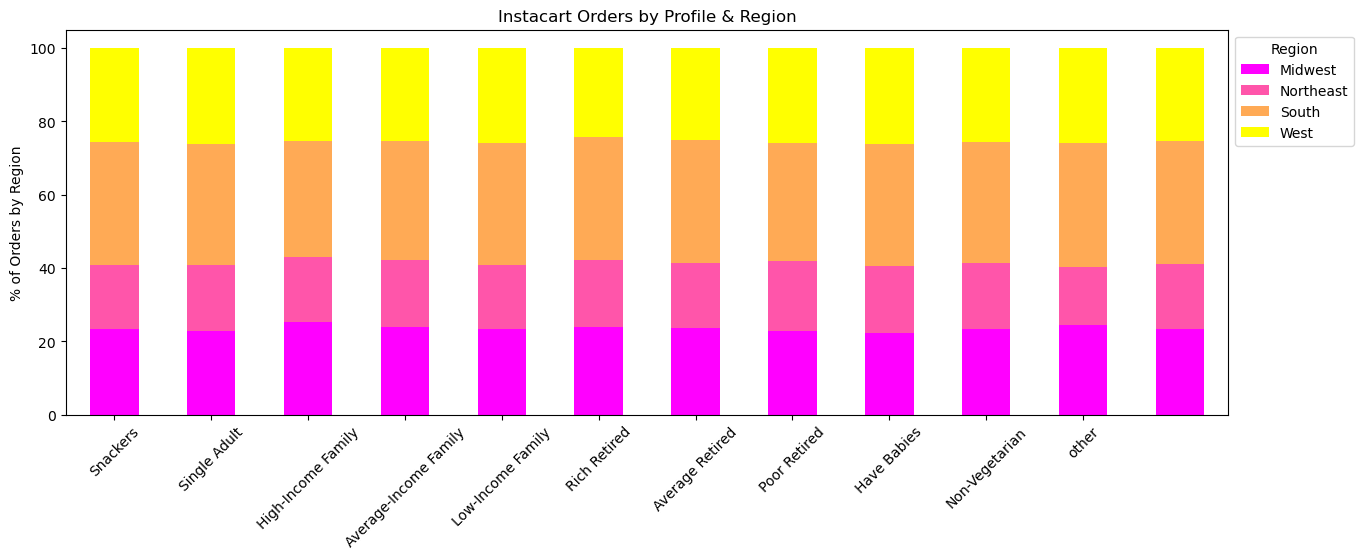

In [107]:
# Creating a stacked barchart of customer profile by region
bar_region_prof = crosstab3.loc[:,['Midwest','Northeast','South','West']].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=45, figsize=(15,5), colormap = 'spring').legend(title="Region", bbox_to_anchor=(1.0,1.0))
plt.xlabel('')
plt.ylabel('% of Orders by Region')
plt.title ('Instacart Orders by Profile & Region')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10],['Snackers','Single Adult','High-Income Family','Average-Income Family','Low-Income Family','Rich Retired','Average Retired','Poor Retired','Have Babies','Non-Vegetarian','other'])

#### Highest % of orders by region is in The South
Marketing team should focus on advertising to their clients in the Northeast

In [108]:
# Exporting the bar chart
bar_region_prof.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','region_profiles_barchart.png'), bbox_inches = 'tight')

Text(0.5, 0, 'Region')

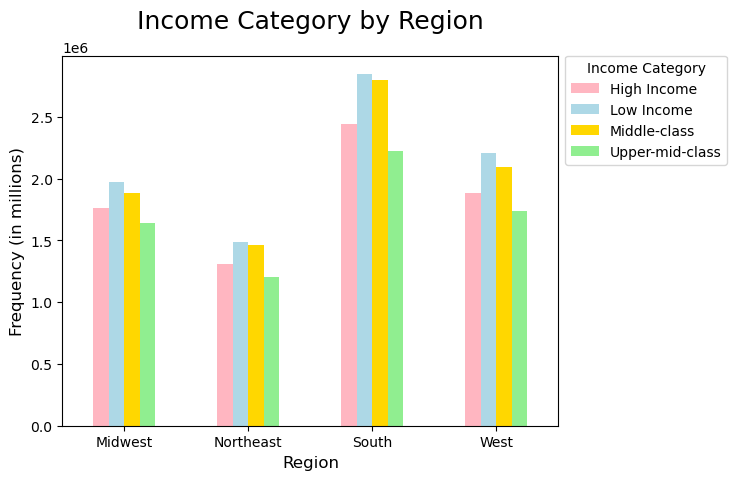

In [109]:
# Drawing a bar chart of income by US regions

bar_inc_reg = crosstab_income_region.plot(kind = 'bar', rot = 0, color= ['lightpink', 'lightblue', 'gold', 'lightgreen'])
# The default for bbox_to_anchor is (0,0,1,1), which is a bounding box over the complete axes. If a different bounding box is specified, is is usually sufficient to use the first two values, which give (x0, y0) of the bounding box.
bar_inc_reg.legend(title='Income Category', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Income Category by Region', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

In [110]:
# Exporting the bar chart
bar_inc_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','income_by_region_barchart.png'), bbox_inches = 'tight')

In [111]:
Cstmr.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median_order_frequency',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'dependents', 'family_status', 'income', 'region', 'activity_flag',
       'age_group', 'family_size', 'household', 'income_group', 'department',
       'alcohol_drinker', 'Have_babies', 'profile'],
      dtype='object')

In [112]:
# Creating order_time_habit and region connection

ct_habit = pd.crosstab(Cstmr['region'], df_ords_prods_cstm['order_time_period'], dropna = False)
ct_habit

order_time_period,Early bird,Night owl,Regular
region,,,
Midwest,670594,1865691,4725228
Northeast,511923,1393014,3559748
South,973296,2631157,6706686
West,731941,2006092,5189194


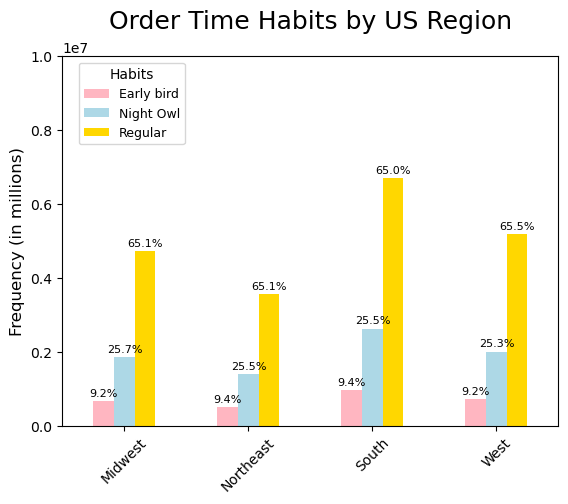

In [113]:
# Plotting stacked bar

bar_hbt_rgn = ct_habit.plot(kind = 'bar', stacked = False, color =['lightpink', 'lightblue', 'gold'])
bar_hbt_rgn.legend(title='Habits', bbox_to_anchor=(0.02, 1.0), loc='upper left', labels=['Early bird', 'Night Owl', 'Regular'], fontsize = 9)
plt.title('Order Time Habits by US Region', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('',  fontsize = 12)
plt.xticks(rotation=45)

# Annotating the bar chart

total = ct_habit.sum(axis=1)

# Calculate the percent for each row
per = ct_habit.div(total, axis=0).mul(100).round(1)

# Iterate through the containers
for c in bar_hbt_rgn.containers:
    
    # Get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # Create custom labels with the bar height and the percent from the per column
    labels = [f'{row}%'if v.get_height() > 0 else '' for v, row in zip(c,per[(label)])]
    
    # Add the annotation
    bar_hbt_rgn.bar_label(c, labels=labels, label_type='edge', fontsize = 8, rotation = 0,  fontweight= 'normal', padding = 2)  
    
    # Set the y axis limit to increase the axis length
    plt.ylim(0, 10000000)

In [114]:
# Exporting the bar chart
bar_hbt_rgn.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_hbt_rgn.png'), bbox_inches='tight')

In [115]:
# Create crosstab by region with loyalty flag
crosstabz2 = pd.crosstab(df_ords_prods_cstm['region'], df_ords_prods_cstm['loyalty_flag'], dropna = False)

Text(0.5, 1.0, 'Loyal Customers by Region')

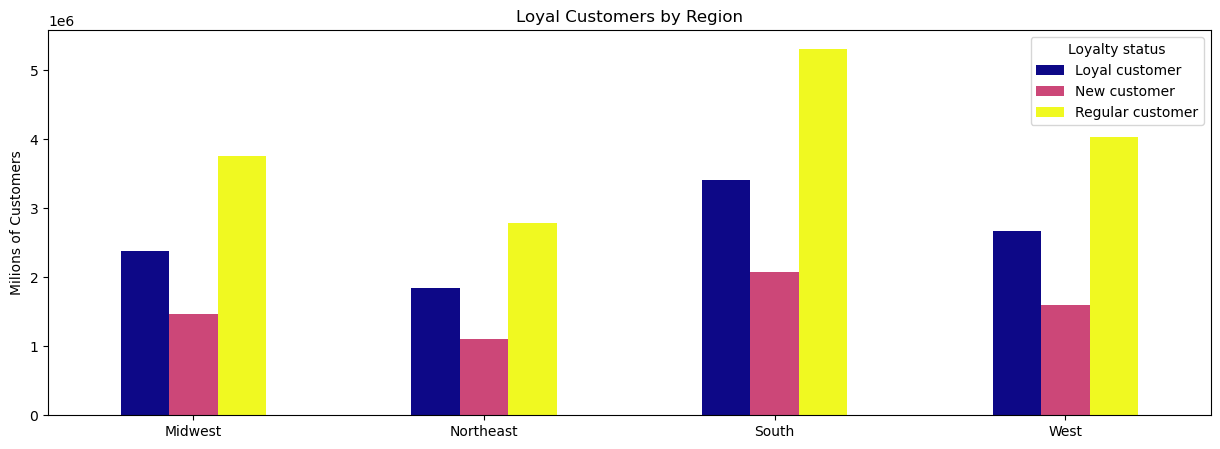

In [116]:
# Create barchart from crosstab
bar_loyalty_region = crosstabz2.iloc[:,[0,1,2]].plot.bar(rot=0, figsize=(15,5), colormap='plasma').legend(title='Loyalty status', bbox_to_anchor=(1.0,1.0))
plt.xlabel('')
plt.ylabel('Milions of Customers')
plt.title ('Loyal Customers by Region')

In [117]:
#Exporting the figure
bar_loyalty_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','loyalty_region_barchart.png'))

In [118]:
# creating a crosstab of region and spending-flag
crosstab6 = pd.crosstab(df_ords_prods_cstm['region'], df_ords_prods_cstm['spending_flag'], dropna = False)

Text(0.5, 1.0, 'Spending by Region')

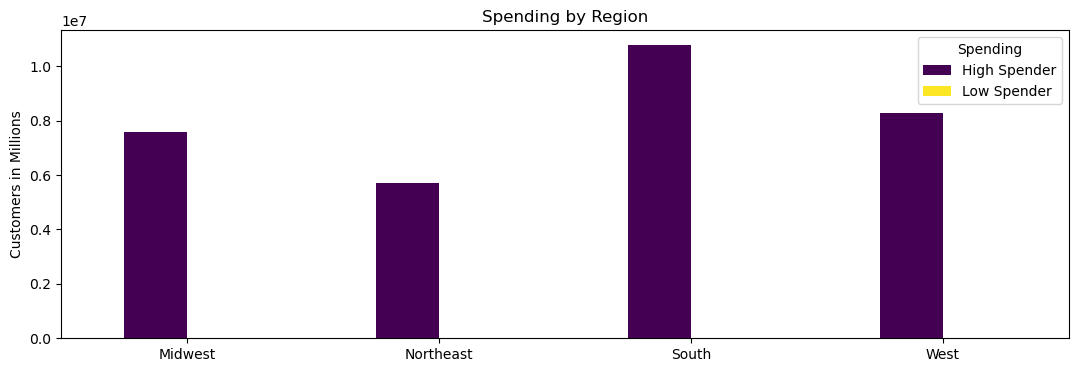

In [119]:
# creating a barchart from the crosstab
bar_spending_region = crosstab6.plot.bar(rot=0, figsize=(13,4), colormap='viridis').legend(title='Spending')
plt.xlabel('')
plt.ylabel('Customers in Millions')
plt.title ('Spending by Region')

In [120]:
# Exporting the bar chart
bar_spending_region = bar_spending_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_spending_region.png'),bbox_inches = 'tight')

### Department and grouped price ranges

In [121]:
#comparing price ranges and departments
crosstab_price_dpt = pd.crosstab(Cstmr['department'], Cstmr['price_range_loc'], dropna = False)

In [122]:
crosstab_price_dpt

price_range_loc,High-range product,Low-range product,Mid-range product
department,,,
alcohol,0,33046,111581
babies,0,121484,288908
bakery,0,274986,845842
beverages,0,814697,1757204
breakfast,0,209185,461665
bulk,0,1181,32270
canned goods,0,281711,730363
dairy eggs,4877,1370908,3801397
deli,0,299220,704614


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

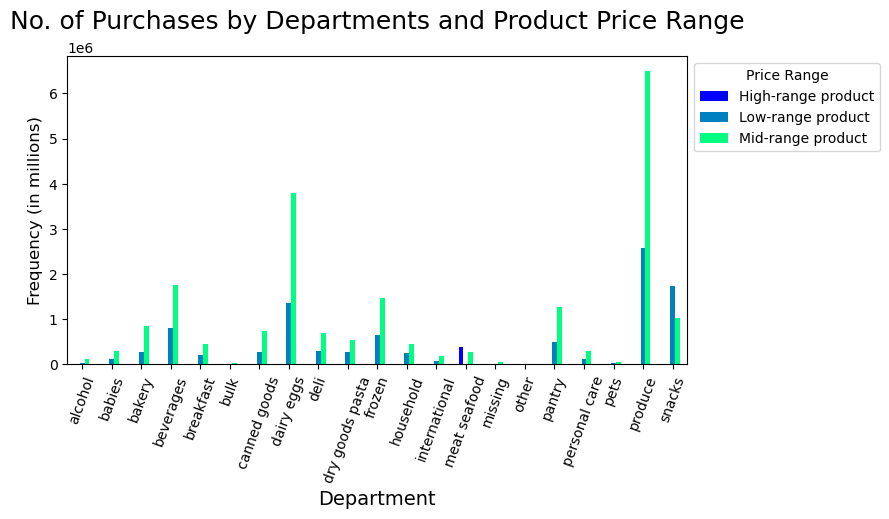

In [123]:
bar_crosstab_price_dpt = crosstab_price_dpt.plot(kind = 'bar', figsize=(8,4), rot = 0, colormap='winter').legend(title="Price Range", bbox_to_anchor=(1.0,1.0))
plt.title('No. of Purchases by Departments and Product Price Range', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Department',  fontsize = 14)
plt.xticks(rotation=70)

In [124]:
# Exporting the chart
bar_crosstab_price_dpt = bar_crosstab_price_dpt.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_dept.png'),bbox_inches = 'tight')

### Department and loyalty status

In [125]:
#comparing loyalty status and departments
crosstab_loyalty_dpt = pd.crosstab(Cstmr['department'], Cstmr ['loyalty_flag'], dropna = False)

In [126]:
crosstab_loyalty_dpt

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1830707,750056,2596419
deli,324046,158335,521453


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

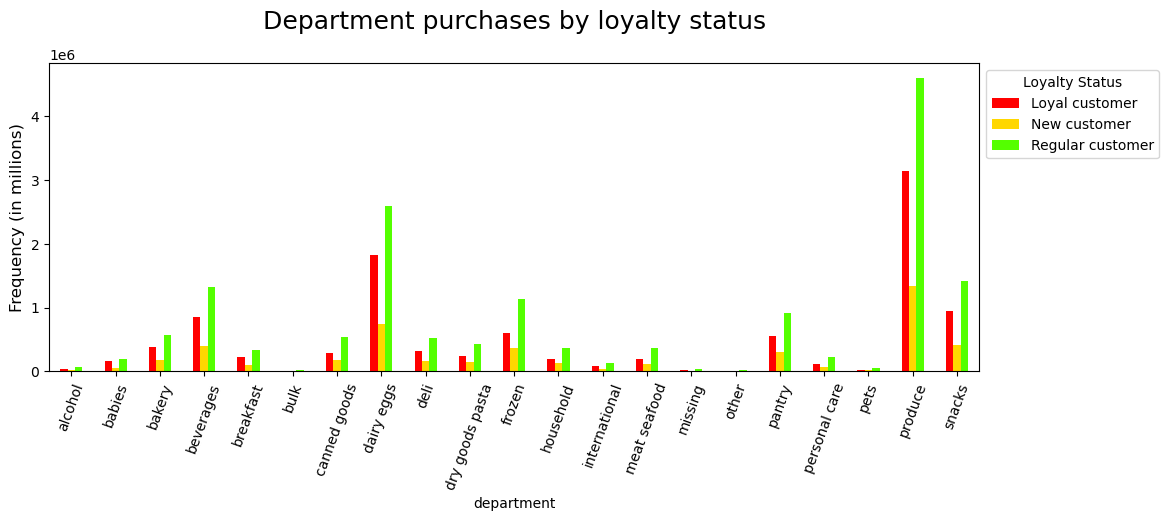

In [127]:
bar_crosstab_loyal_dpt = crosstab_loyalty_dpt.plot(kind = 'bar', figsize=(12,4), rot = 0, colormap='prism').legend(title="Loyalty Status", bbox_to_anchor=(1.0,1.0))
plt.title('Department purchases by loyalty status', fontsize = 18, pad=25)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xticks(rotation=70)

In [128]:
# Export Chart
bar_crosstab_loyal_dpt = bar_crosstab_loyal_dpt.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyal_dpt.png'),bbox_inches = 'tight')

#### Region and loyalty status

In [129]:
#comparing regions and loyalty status
crosstab_region_loyalty = pd.crosstab(Cstmr['region'], Cstmr['loyalty_flag'], dropna = False)

In [130]:
crosstab_region_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1136761,3750978
Northeast,1841785,842156,2780744
South,3405844,1593664,5311631
West,2662690,1231114,4033423


Text(0.5, 0, 'Region')

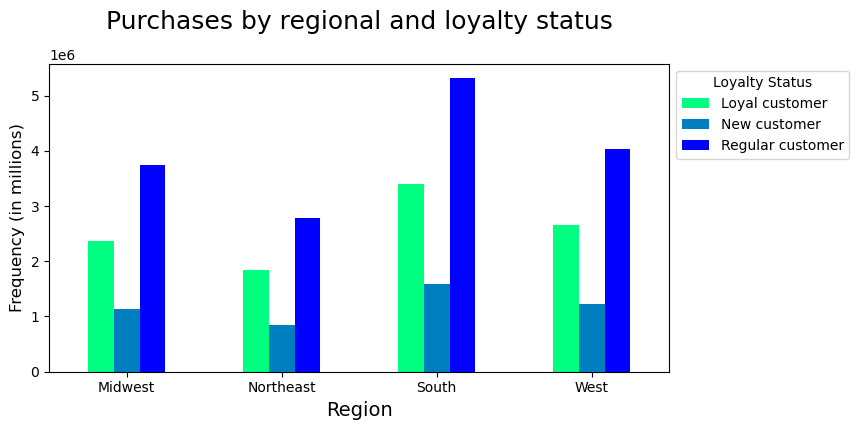

In [131]:
bar_crosstab_loyal_region = crosstab_region_loyalty.plot(kind = 'bar', figsize=(8,4), rot = 0, colormap='winter_r').legend(title="Loyalty Status", bbox_to_anchor=(1.0,1.0))
plt.title('Purchases by regional and loyalty status', fontsize = 18, pad=25)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 14)

In [132]:
# Exporting the chart
bar_crosstab_loyal_region = bar_crosstab_loyal_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyal_reg.png'),bbox_inches = 'tight')

#### Region and grouped price

In [133]:
#comparing regions and product price range
crosstab_region_price = pd.crosstab(Cstmr['region'], Cstmr['price_range_loc'], dropna = False)

In [134]:
crosstab_region_price

price_range_loc,High-range product,Low-range product,Mid-range product
region,,,
Midwest,93280,2267085,4901148
Northeast,69732,1712360,3682593
South,132661,3217500,6960978
West,102280,2477895,5347052


Text(0, 0.5, 'No. purchases (in millions)')

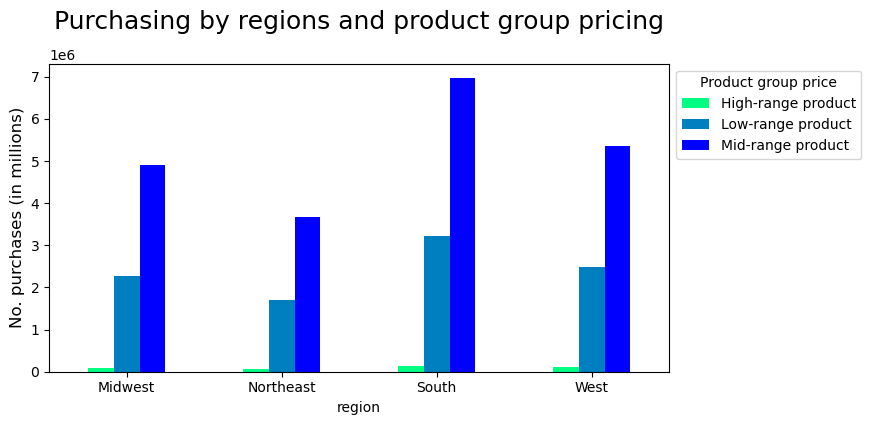

In [135]:
bar_crosstab_region_price = crosstab_region_price.plot(kind = 'bar', figsize=(8,4), rot = 0, colormap='winter_r').legend(title="Product group price", bbox_to_anchor=(1.0,1.0))
plt.title('Purchasing by regions and product group pricing', fontsize = 18, pad=25)
plt.ylabel('No. purchases (in millions)', fontsize = 12)

In [136]:
# Exporting the chart

bar_crosstab_region_price = bar_crosstab_region_price.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_price.png'),bbox_inches = 'tight')

#### Region and income

In [137]:
#comparing region and income
crosstab_income_region = pd.crosstab(Cstmr['region'],Cstmr['income_group'], dropna = False)

In [138]:
crosstab_income_region

income_group,High Income,Low Income,Middle-class,Upper-mid-class
region,,,,
Midwest,1763002,1974266,1887154,1637091
Northeast,1308807,1486808,1461393,1207677
South,2442801,2849538,2797656,2221144
West,1886804,2209921,2090426,1740076


Text(0.5, 0, '')

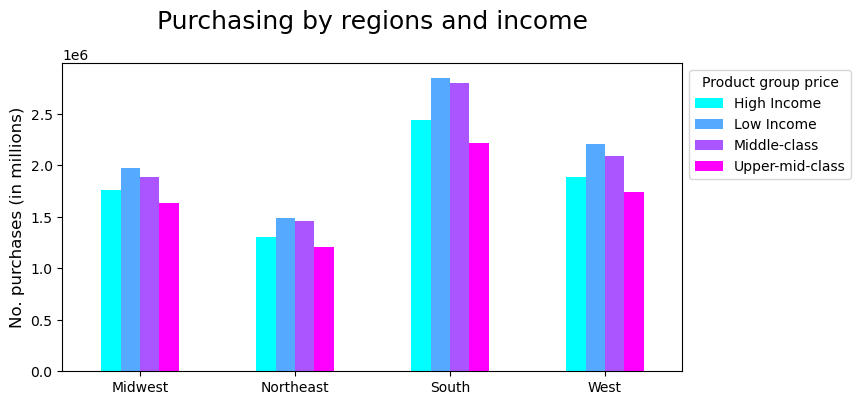

In [139]:
bar_crosstab_region_income = crosstab_income_region.plot(kind = 'bar', figsize=(8,4), rot = 0, colormap='cool').legend(title="Product group price", bbox_to_anchor=(1.0,1.0))
plt.title('Purchasing by regions and income', fontsize = 18, pad=25)
plt.ylabel('No. purchases (in millions)', fontsize = 12)
plt.xlabel('')

In [140]:
# Exporting the bar chart
bar_crosstab_region_income = bar_crosstab_region_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_income.png'), bbox_ibches = 'tight')

/var/folders/m2/zxgfyynd7mlcccmlnk3x0n800000gn/T/ipykernel_43996/2858288703.py:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_ibches" which is no longer supported as of 3.3 and will become an error in 3.6
  bar_crosstab_region_income = bar_crosstab_region_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_income.png'), bbox_ibches = 'tight')


####  Income and day of week

In [141]:
#comparing region and income
crosstab_income_day = pd.crosstab(Cstmr['income_group'], Cstmr['orders_day_of_week'], dropna = False)

In [142]:
crosstab_income_day

orders_day_of_week,0,1,2,3,4,5,6
income_group,,,,,,,
High Income,1446185,1267604,949871,874012,862650,946666,1054426
Low Income,1500105,1575444,1144197,1035842,1024861,1145120,1094964
Middle-class,1640770,1409868,1057281,957030,949473,1053648,1168559
Upper-mid-class,1321550,1158770,873357,802651,788010,888295,973355


Text(0.5, 0, 'Income')

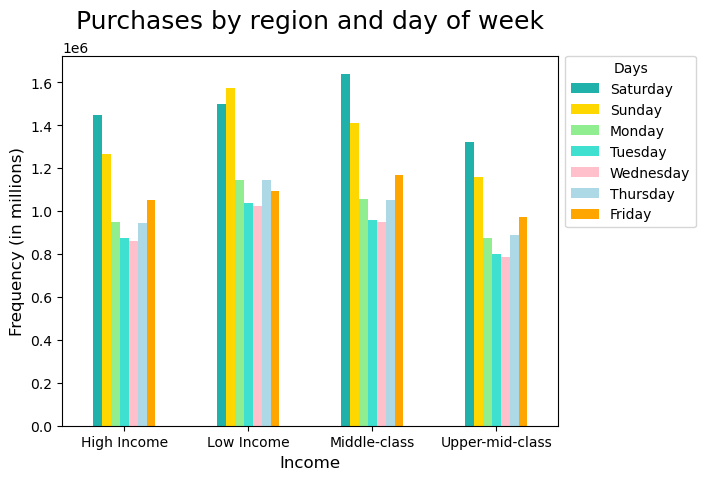

In [143]:
bar_income_day = crosstab_income_day.plot(kind = 'bar', rot = 0, color= ['lightseagreen', 'gold', 'lightgreen', 'turquoise', 'pink', 'lightblue', 'orange'])
bar_income_day.legend(title='Days', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Purchases by region and day of week', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Income',  fontsize = 12)

In [144]:
bar_income_day = bar_income_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_day.png'),bbox_inches = 'tight')